In [1]:
import os
from scipy.io import loadmat

data_path=['/Users/Samuel/Desktop/Development/Git_Hub/Praticas_IC/TP_K-means/CI_K-means/Kmeans/Data']

def function_filepath(data):
    filepath = os.sep.join(data_path + [data])
    return filepath

data_1 = loadmat(function_filepath('data2.mat'))

In [2]:
import pandas as pd

# X e Y
X = pd.DataFrame(data_1['X'], columns = ['X','y'])

### Algoritmo K-means 

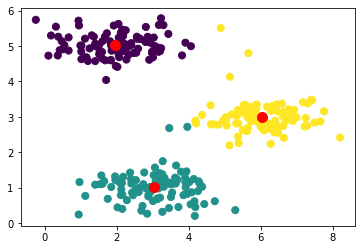

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

kmeans = KMeans(n_clusters = 3, max_iter = 10).fit(X)
y_predict = kmeans.predict(X)

plt.scatter(X['X'], X['y'], c=y_predict, s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=1);

### Plot Inertia - Custo 

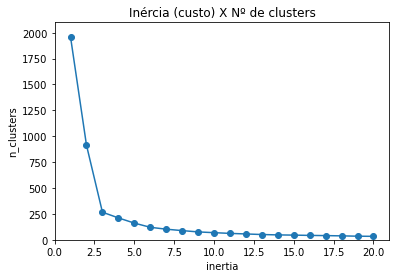

In [12]:
inertia = []
new_kmeans = []

# ajuste Kmeans
for i in range(20):
    new_kmeans.append(i+1)
    kmeans = KMeans(n_clusters = i+1, max_iter = 10).fit(X)
    inertia.append(kmeans.inertia_)

# plot inertia
plt.scatter(new_kmeans,inertia)
plt.plot(new_kmeans,inertia)
plt.xlabel('inertia')
plt.ylabel('n_clusters')
plt.axis([0,21,0,2100])
plt.title('Inércia (custo) X Nº de clusters')
plt.show()

### Hierarchical Agglomerative Clustering

In [5]:
from sklearn.cluster import AgglomerativeClustering

#Usando: linkage ward
lw_clustering = AgglomerativeClustering(n_clusters = 3, linkage='ward')
lw_predict = lw_clustering.fit_predict(X)

#Usando: linkage average
la_clustering = AgglomerativeClustering(n_clusters = 3, linkage='average')
la_predict = la_clustering.fit_predict(X)

#Usando: linkage single
ls_clustering = AgglomerativeClustering(n_clusters = 3, linkage='single')
ls_predict = ls_clustering.fit_predict(X)

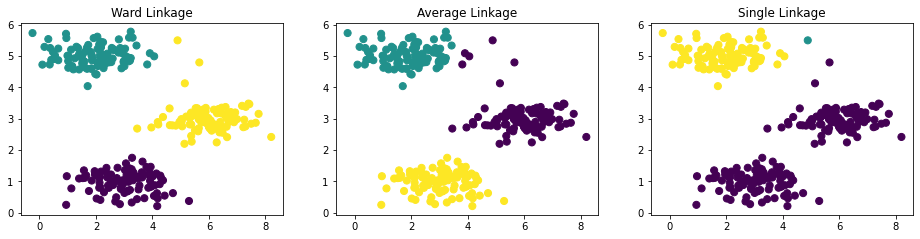

In [6]:
import matplotlib.gridspec as gridspec

# Create 1x3 sub plots
gs = gridspec.GridSpec(3, 3)

plt.figure(figsize=(16, 12))
ax = plt.subplot(gs[0, 0]) # row 0, col 0
plt.scatter(X['X'], X['y'], c=lw_predict, s=50, cmap = 'viridis')
plt.title('Ward Linkage')

ax = plt.subplot(gs[0, 1]) # row 0, col 1
plt.scatter(X['X'], X['y'], c=la_predict, s=50, cmap = 'viridis')
plt.title('Average Linkage')

ax = plt.subplot(gs[0, 2]) # row 0, col 2
plt.scatter(X['X'], X['y'], c=ls_predict, s=50, cmap = 'viridis')
plt.title('Single Linkage')
plt.show()

### Plot Dendrogram

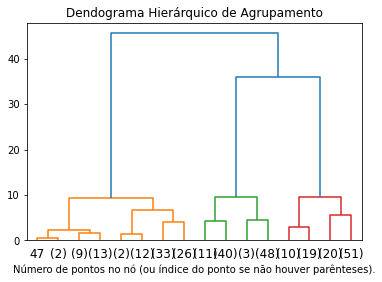

In [13]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram

# Cria a matriz de ligação e, em seguida, plotar o dendrograma
def plot_dendrogram(model, **kwargs):

    # cria a contagem de amostras em cada nó
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # nó folha.
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plota o dendrograma correspondente
    dendrogram(linkage_matrix, **kwargs)
    

plt.title('Dendograma Hierárquico de Agrupamento')
model = AgglomerativeClustering(distance_threshold=0, n_clusters = None, linkage='ward').fit(X)
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Número de pontos no nó (ou índice do ponto se não houver parênteses).")
plt.show()

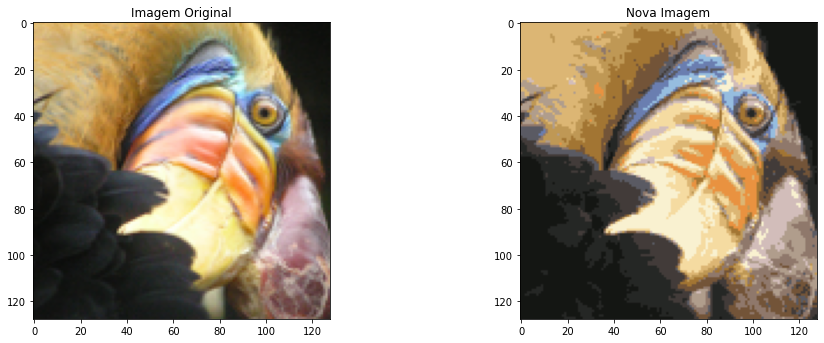

In [11]:
import matplotlib.image as mpimg

original_Image = mpimg.imread(function_filepath('bird_small.png'))
data_2 = loadmat(function_filepath('bird_small.mat'))

# Tratamento de A - RGB entre 0 e 255 para entre 0 e 1.
A = data_2['A']/255
size_A = len(A)
new_A = A.reshape((size_A * size_A),3)

kmeans = KMeans(n_clusters=16, random_state=0).fit(new_A)

# A ideia é usar a matriz de dados em data_2 que representa as cores RGB para reproduzir a mesma imagem usando Kmeans.
newPixels = []
for i in kmeans.labels_:
    newPixels.append(list(kmeans.cluster_centers_[i,:]))
 
newPixels = np.array(newPixels)
newImage = newPixels.reshape((size_A,size_A,3))

# Create 2x2 sub plots
gs = gridspec.GridSpec(2, 2)
plt.figure(figsize=(16, 12))

ax = plt.subplot(gs[0, 0]) # row 0, col 0
plt.title('Imagem Original')     
plt.imshow(original_Image)

ax = plt.subplot(gs[0, 1]) # row 0, col 1
plt.title('Nova Imagem')     
plt.imshow(newImage)
plt.show()